# Redes neuronales 2017
## Trabajo práctico 2

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('tp2_training_dataset.csv', header=None)

X = df.ix[:,1:]
y = df.ix[:,0]

# partición del conjunto de datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

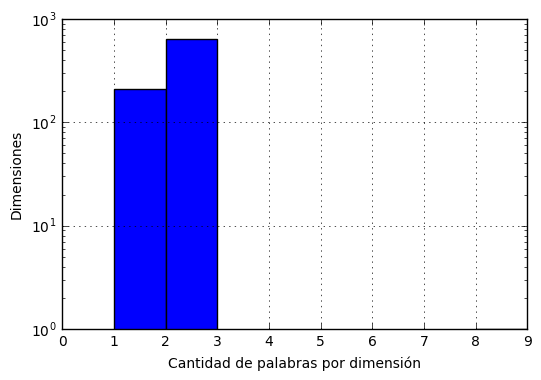

In [3]:
df[1:].max().hist(bins=range(10))
plt.yscale('log')
plt.xlabel('Cantidad de palabras por dimensión')
plt.ylabel('Dimensiones')
plt.savefig('histograma.pdf')

In [4]:
df[0].value_counts(sort=False)

1     98
2    100
3    100
4     98
5    102
6    106
7     98
8    101
9     97
Name: 0, dtype: int64

In [5]:
def lotes(X, y, n):
    if n < 1: n = len(X)
    
    for i in range(0, len(X), n):
        yield X[i:i+n], y[i:i+n]

        
def barajar(X, y):
    e = np.random.get_state()
    X = np.random.permutation(X)
    np.random.set_state(e)
    y = np.random.permutation(y)
    
    return X, y

## Parte 1

In [6]:
from sklearn.base import BaseEstimator

class NS(BaseEstimator):

    def __init__(self, inicialización=(-1,1), tamaño_lote=1, factor_aprendizaje=0.001, épocas=100, salidas=3, regla='sanger'):
        self.inicialización = inicialización
        self.tamaño_lote = tamaño_lote
        self.factor_aprendizaje = factor_aprendizaje
        self.épocas = épocas
        self.salidas = salidas
    
        if regla == 'Sanger':
            self.regla = lambda eta, X, Y, W: eta * (np.dot(X.T, Y) - np.dot(W, np.tril( np.dot(Y.T,Y) ) ) )
        elif regla == 'Oja':
            self.regla = lambda eta, X, Y, W: eta * np.dot( (X - np.dot(Y, W.T) ).T, Y)
        elif regla == 'Hebb':
            self.regla = lambda eta, X, Y, W: eta * np.dot(X.T, Y)
    
    
    def fit(self, X, y):
        # asegurarse de que 'y' sea 2D
        if y.ndim == 1:
            y = y.reshape((-1, 1))
        
        entradas = X.shape[1]
        
        forma = (entradas, self.salidas)
        self.W = np.random.uniform(low=self.inicialización[0], high=self.inicialización[1], size=forma)
         
        eta = self.factor_aprendizaje
        
        for época in range(self.épocas):
            _X, _y = barajar(X, y)
            
            for lote_X, lote_y in lotes(_X, _y, self.tamaño_lote):
                Y = np.dot(lote_X, self.W)
                self.W += self.regla(eta, lote_X, Y, self.W)
            
        return self
    
                 
    def predict(self, X):
        return np.dot(X, self.W)

In [7]:
def plot_ns(X_test, y_test):
    proyecciones = [( 60, 60),(150, 60),
                    ( 60,150),(240,240),]
    
    plt.figure(figsize=(5, 5))
    
    for i,(a,b) in enumerate(proyecciones):
        ax = plt.subplot(2,2,i+1, projection='3d')
        ax.scatter(xs=X_test[:,0],  ys=X_test[:,1],  zs=X_test[:,2],  c=y_test,  marker='.', lw=0)
        ax.view_init(a, b)
    
        #ax.set_xlabel('x')
        #ax.set_ylabel('y')
        #ax.set_zlabel('z')

        # Get rid of the panes                          
        #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
        #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
        #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

        # Get rid of the spines                         
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
        # Get rid of the ticks                          
        ax.set_xticks([])                               
        ax.set_yticks([])                               
        ax.set_zticks([])

In [8]:
def plot_ns_val(X_train, X_test):
    proyecciones = [( 60, 60),(150, 60),
                    ( 60,150),(240,240),]
    
    plt.figure(figsize=(5, 5))
    
    for i,(a,b) in enumerate(proyecciones):
        ax = plt.subplot(2,2,i+1, projection='3d')
        ax.scatter(xs=X_train[:,0], ys=X_train[:,1], zs=X_train[:,2], c='b', marker='.', lw=0)
        ax.scatter(xs=X_test[:,0],  ys=X_test[:,1],  zs=X_test[:,2],  c='r',  marker='.', lw=0)
        ax.view_init(a, b)
    
        #ax.set_xlabel('x')
        #ax.set_ylabel('y')
        #ax.set_zlabel('z')

        # Get rid of the panes                          
        #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
        #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
        #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

        # Get rid of the spines                         
        ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
        ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    
        # Get rid of the ticks                          
        ax.set_xticks([])                               
        ax.set_yticks([])                               
        ax.set_zticks([])

In [1197]:
def exp(regla, épocas, factor_aprendizaje):
    rn = NS(factor_aprendizaje=factor_aprendizaje, épocas=épocas, salidas=3, regla=regla)
    clf = make_pipeline(StandardScaler(), rn)
    clf.fit(X_train, y_train)

    plot_ns(clf.predict(X_test), y_test)
    plt.suptitle('Regla de %s - %s épocas - eta %s' % (regla, épocas, factor_aprendizaje))
    plt.savefig('%s_%s_%s.pdf' % (regla.lower(), épocas, factor_aprendizaje))

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


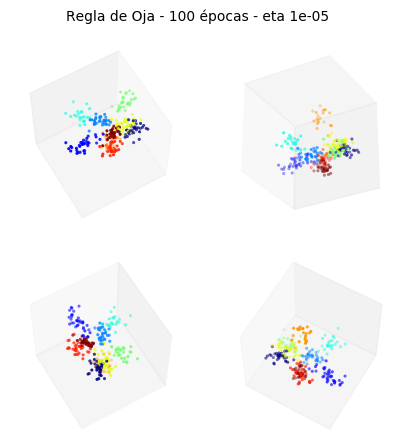

In [1213]:
exp('Oja', 100, 1e-5)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


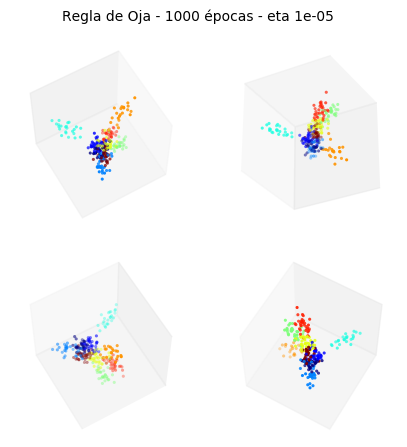

In [1214]:
exp('Oja', 1000, 1e-5)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


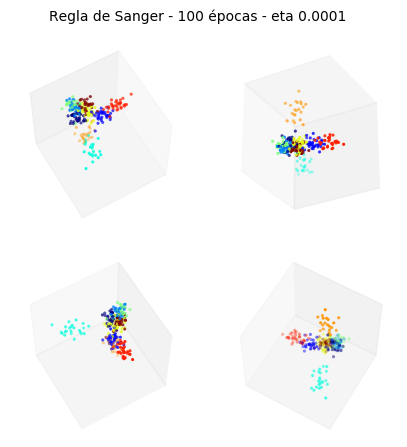

In [1206]:
exp('Sanger', 100, 1e-4)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


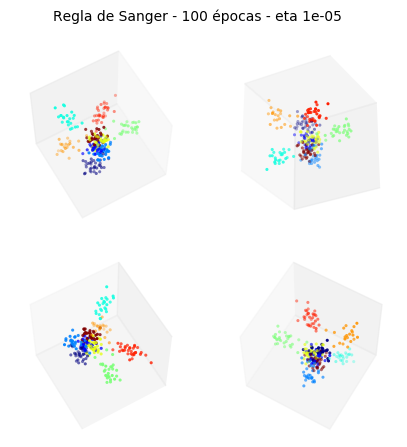

In [1208]:
exp('Sanger', 100, 1e-5)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


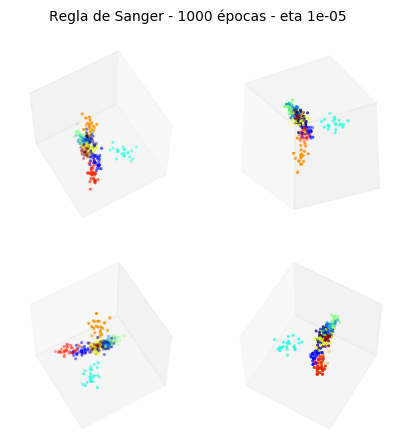

In [1209]:
exp('Sanger', 1000, 1e-5)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


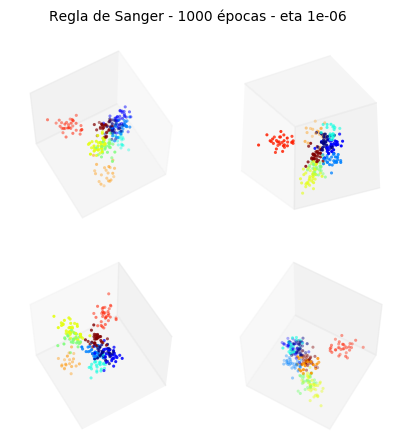

In [1211]:
exp('Sanger', 1000, 1e-6)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


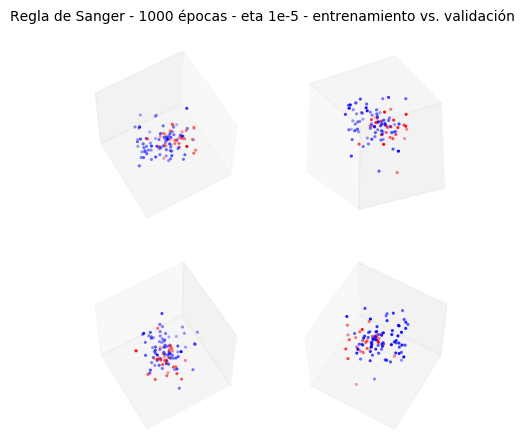

In [1215]:
rn = NS(factor_aprendizaje=1e-5, épocas=1000, salidas=3, regla='Sanger')
clf = make_pipeline(StandardScaler(), rn)
clf.fit(X_train, y_train)

plot_ns_val(clf.predict(X_train[y_train == 5]), clf.predict(X_test[y_test == 5]))
plt.suptitle('Regla de Sanger - 1000 épocas - eta 1e-05 - entrenamiento vs. validación')
plt.savefig('sanger_1000_1e-05_entrenamiento_validación.pdf')

## Parte 2

In [48]:
from itertools import product
from collections import Counter
from sklearn.base import BaseEstimator

class SOM(BaseEstimator):

    def __init__(self, inicialización=(-.1,.1), factor_aprendizaje=.1, épocas=10, lado=3):
        self.inicialización = inicialización
        self.factor_aprendizaje = factor_aprendizaje
        self.épocas = épocas
        self.lado = lado
        
    
    def fit(self, X, y):
        # factor de aprendizaje
        L = lambda l0, t, T: l0 * np.exp(-t/T)
        # función de proximidad
        O = lambda n1, n2, R, t, T: np.exp(-np.linalg.norm(n1 - n2)**2 / (2 * L(R,t,T)**2))

        # asegurarse de que 'y' sea 2D
        if y.ndim == 1:
            y = y.reshape((-1, 1))
        
        entradas = X.shape[1]
        W = lambda: np.random.uniform(low=self.inicialización[0], high=self.inicialización[1], size=entradas)
        self.nodos = [{'V':np.array([x,y]), 'W':W()} for x,y in product(range(self.lado), range(self.lado))]
        
        for época in range(self.épocas):
            _X, _y = barajar(X, y)
    
            for x, lote_y in lotes(_X, _y, 1):
                x = x.reshape(-1)
                bmd = float('inf')
                bmu = None
    
                # selección de la BMU (best matching unit) a a partir de la BMD (best matching distance)
                for nodo in self.nodos:
                    distancia = np.linalg.norm(x - nodo['W'])
    
                if distancia < bmd:
                    bmd = distancia
                    bmu = nodo
    
            # actualización de los pesos
            for nodo in self.nodos:
                nodo['W'] += L(self.factor_aprendizaje, época, self.épocas) * \
                             O(bmu['V'], nodo['V'], 1 * 5, época, self.épocas) * (x - nodo['W'])
                
        return self
    
                 
    def predict(self, X, y):
        for nodo in self.nodos: nodo['contador'] = Counter()
        
        for x, _y in lotes(X, y, 1):
            #x = x.reshape(-1)
            bmd = float('inf')
            bmu = None
    
            # selección del best matching unit
            for nodo in self.nodos:
                distancia = np.linalg.norm(x - nodo['W'])
    
                if distancia < bmd:
                    bmd = distancia
                    bmu = nodo
        
            bmu['contador'][_y.values[0]] += 1
        
        for nodo in self.nodos:
            if len(nodo['contador']) > 0:
                nodo['categoría'] = nodo['contador'].most_common()[0][0]
            else:
                nodo['categoría'] = 0
        
        return self.nodos

In [10]:
def plot_som(nodos_train, nodos_test, size=(5, 5)):
    plt.figure(figsize=size)

    n = [(nodo['V'][0], nodo['V'][1], nodo['categoría']) for nodo in nodos_train if nodo['categoría'] != 0]
    plt.scatter([nodo[0] for nodo in n], \
                [nodo[1] for nodo in n], \
              c=[nodo[2] for nodo in n], s=1000, marker=',', lw=0)
    
    n = [(nodo['V'][0], nodo['V'][1], nodo['categoría']) for nodo in nodos_test if nodo['categoría'] != 0]
    plt.scatter([nodo[0] for nodo in n], \
                [nodo[1] for nodo in n], \
              c=[nodo[2] for nodo in n], s=1000, marker='.', lw=.1)
        
    ax = plt.gca()
    
    [ax.spines[spine].set_visible(False) for spine in ax.spines]
                         
    ax.set_xticks([])                               
    ax.set_yticks([])                               

In [11]:
def plot_som_comp(nodos_train, nodos_test, size=(5, 5)):
    plt.figure(figsize=size)

    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        
        ax.scatter([nodo['V'][0] for nodo in nodos_train], \
                   [nodo['V'][1] for nodo in nodos_train], \
                   c=[nodo['contador'][i+1] for nodo in nodos_train], s=1000, marker=',', lw=0, cmap='Greys')
                       
        ax.set_xticks([])                               
        ax.set_yticks([])

In [ ]:
scaler = StandardScaler(with_std=False)
scaler.fit(X_train)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


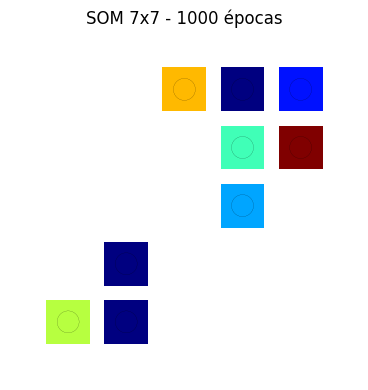

In [84]:
d = SOM(factor_aprendizaje=.1, épocas=100, lado=5).fit(scaler.transform(X_train), y_train)

plot_som(d.predict(scaler.transform(X_train), y_train), d.predict(scaler.transform(X_test), y_test), size=(4.5, 4.5))
plt.title('SOM 7x7 - 1000 épocas')
#plt.savefig('som_7x7.pdf')

In [ ]:
rn = NS(factor_aprendizaje=1e-5, épocas=100, salidas=3, regla='Sanger')
clf3 = make_pipeline(StandardScaler(), rn)
clf3.fit(X_train, y_train)

d3 = SOM(factor_aprendizaje=1, épocas=1000, lado=7).fit(clf3.predict(X_train), y_train)

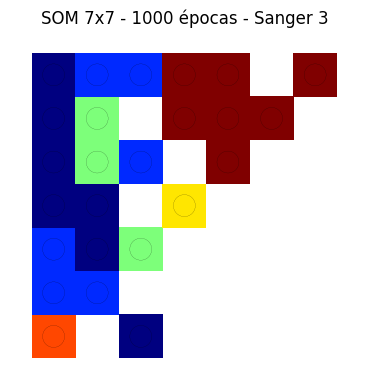

In [1216]:
plot_som(d3.predict(clf3.predict(X_train), y_train), d3.predict(clf3.predict(X_test), y_test), size=(4.5, 4.5))
plt.title('SOM 7x7 - 1000 épocas - Sanger 3')
plt.savefig('som_7x7_sanger_3.pdf')

In [16]:
rn = NS(factor_aprendizaje=1e-5, épocas=100, salidas=9, regla='Sanger')
clf9 = make_pipeline(StandardScaler(), rn)
clf9.fit(X_train, y_train)

d9 = SOM(factor_aprendizaje=1, épocas=1000, lado=7).fit(clf9.predict(X_train), y_train)

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


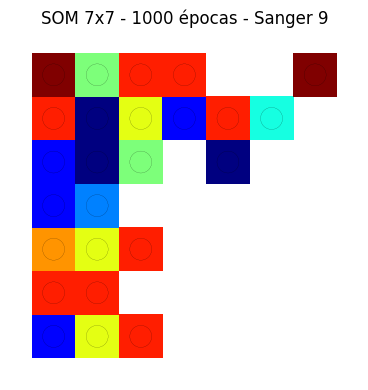

In [1229]:
plot_som(d9.predict(clf9.predict(X_train), y_train), d9.predict(clf9.predict(X_test), y_test), size=(4.5, 4.5))
plt.title('SOM 7x7 - 1000 épocas - Sanger 9')
plt.savefig('som_7x7_sanger_9.pdf')

In [ ]:
d9_10 = SOM(factor_aprendizaje=1, épocas=1000, lado=10).fit(clf9.predict(X_train), y_train)

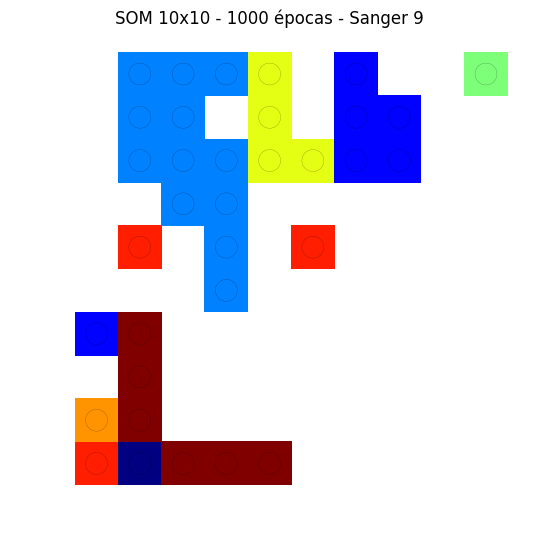

In [1185]:
plot_som(d9_10.predict(clf9.predict(X_train), y_train), d9_10.predict(clf9.predict(X_test), y_test), size=(6.7, 6.7))
plt.title('SOM 10x10 - 1000 épocas - Sanger 9')
plt.savefig('som_10x10_sanger_9.pdf')

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


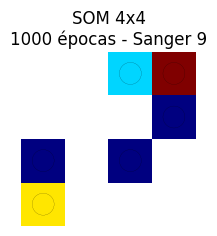

In [82]:
d9_4 = SOM(factor_aprendizaje=.1, épocas=100, lado=4).fit(clf9.predict(X_train), y_train)

plot_som(d9_4.predict(clf9.predict(X_train), y_train), d9_4.predict(clf9.predict(X_test), y_test), size=(2.25, 2.25))
plt.title('SOM 4x4\n1000 épocas - Sanger 9')
#plt.savefig('som_4x4_sanger_9.pdf')

/home/matias/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


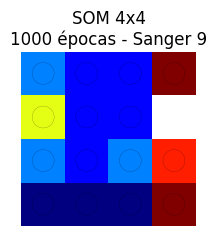

In [1284]:
d9_4 = SOM(factor_aprendizaje=1, épocas=100, lado=4).fit(clf9.predict(X_train), y_train)

plot_som(d9_4.predict(clf9.predict(X_train), y_train), d9_4.predict(clf9.predict(X_test), y_test), size=(2.25, 2.25))
plt.title('SOM 4x4\n1000 épocas - Sanger 9')
plt.savefig('som_4x4_sanger_9.pdf')

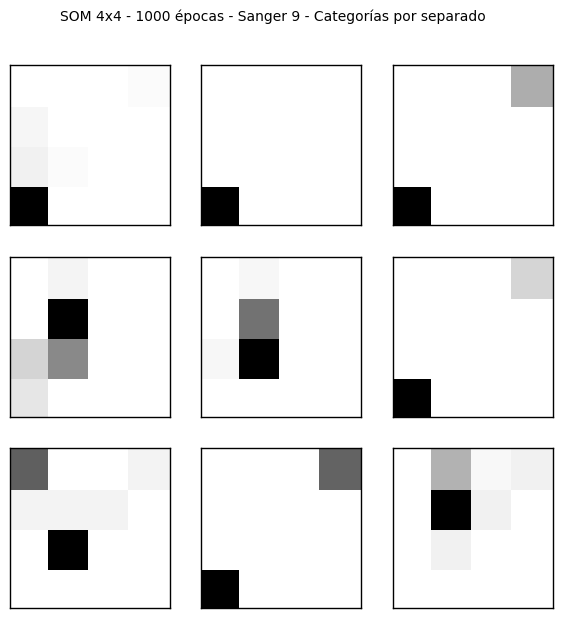

In [1183]:
plot_som_comp(d9_4.predict(clf9.predict(X_train), y_train), d9_4.predict(clf9.predict(X_test), y_test), size=(7, 7))
plt.suptitle('SOM 4x4 - 1000 épocas - Sanger 9 - Categorías por separado')
#plt.savefig('som_4x4_sanger_9_categorías.pdf')